## <div style="background-color: navy; color: #FFFFFF; padding: 12px; line-height: 1.3;">2 | 📌KHÁM PHÁ DỮ LIỆU</div>  

**1. Thư viện**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from datetime import date as dt
import collections
import warnings
warnings.simplefilter(action='ignore')

**2. Đọc file**


In [2]:
df = pd.read_csv('Processed_Dataset.csv')
df.head()

,address,categoryName,hotelStars,location/lat,location/lng,state,title,totalScore,reviewsCount,Loại hình,Giờ mở cửa,Giờ đóng cửa,Tổng giờ hoạt động
0,"2 Đ. Phù Đổng Thiên Vương, Phường 11, Quận 5, ...",Nhà hàng bánh kếp,NaN,10.752221,106.662932,Quận 5,Chú bánh hẹ Chợ Xã Tây,4.5,8,Nhà hàng/ địa điểm ăn uống,15.0,20.0,5.0
1,"412 Đ. Nguyễn Trãi, Phường 8, Quận 5, Hồ Chí M...",Khách sạn,NaN,10.755379,106.672899,Quận 5,Khách Sạn Như Phượng 2,3.6,20,Khách sạn,NaN,NaN,NaN
2,"No 10 Cao Dat - Tran Binh Trong Street, Phường...",Khách sạn,2.0,10.754048,106.682054,Quận 5,Hera Halong Hotel,3.0,3,Khách sạn,NaN,NaN,NaN
3,"126 Đ. Hùng Vương, Phường 12, Quận 5, Hồ Chí M...",Nhà hàng Hàn Quốc,NaN,10.755849,106.662619,Quận 5,Dookki,3.7,151,Nhà hàng/ địa điểm ăn uống,10.5,22.0,11.5
4,"206/23 Đ. Trần Hưng Đạo, Phường 11, Quận 5, Hồ...",Quán ăn nhỏ,NaN,10.753111,106.666192,Quận 5,Hủ tiếu Minh Ký,4.4,41,Nhà hàng/ địa điểm ăn uống,6.0,11.0,5.0


**3. Mỗi hàng có ý nghĩa gì? Có vấn đề gì nếu các hàng có ý nghĩa khác nhau?**

In [3]:
shape = df.shape
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])

Số dòng: 17014
Số cột: 13


Dựa trên dữ liệu, có vẻ không có vấn đề gì về các dòng có ý nghĩa khác nhau. Mỗi dòng đại diện cho một phương tiện điện cụ thể và các cột tương ứng chứa thông tin chi tiết về phương tiện đó. 

**Dữ liệu có trùng lặp hay không.**

In [4]:
num_duplicated_rows = df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


**3. Mỗi cột có ý nghĩa gì?**

In [5]:
df.columns

Index(['address', 'categoryName', 'hotelStars', 'location/lat', 'location/lng',
       'state', 'title', 'totalScore', 'reviewsCount', 'Loại hình',
       'Giờ mở cửa', 'Giờ đóng cửa', 'Tổng giờ hoạt động'],
      dtype='object')

In [6]:
numeric_summary = df.describe()
numeric_summary

,hotelStars,location/lat,location/lng,totalScore,reviewsCount,Giờ mở cửa,Giờ đóng cửa,Tổng giờ hoạt động
count,600.000000,17014.000000,17014.000000,12570.000000,17014.000000,8244.000000,8244.000000,8244.000000
mean,2.533333,10.802448,106.657828,4.268695,91.890855,7.823706,19.321814,12.674090
std,0.927536,0.091488,0.079556,0.740442,689.287149,4.357475,5.644157,5.715853
min,1.000000,10.377503,106.371523,1.000000,0.000000,0.000000,0.000000,0.016667
25%,2.000000,10.752170,106.612244,4.000000,0.000000,6.000000,19.000000,8.000000
50%,2.000000,10.793606,106.651774,4.300000,3.000000,7.500000,21.000000,12.500000
75%,3.000000,10.846724,106.705313,5.000000,28.000000,10.000000,22.500000,15.000000
max,5.000000,11.146107,107.004462,5.000000,34878.000000,22.000000,24.000000,24.000000


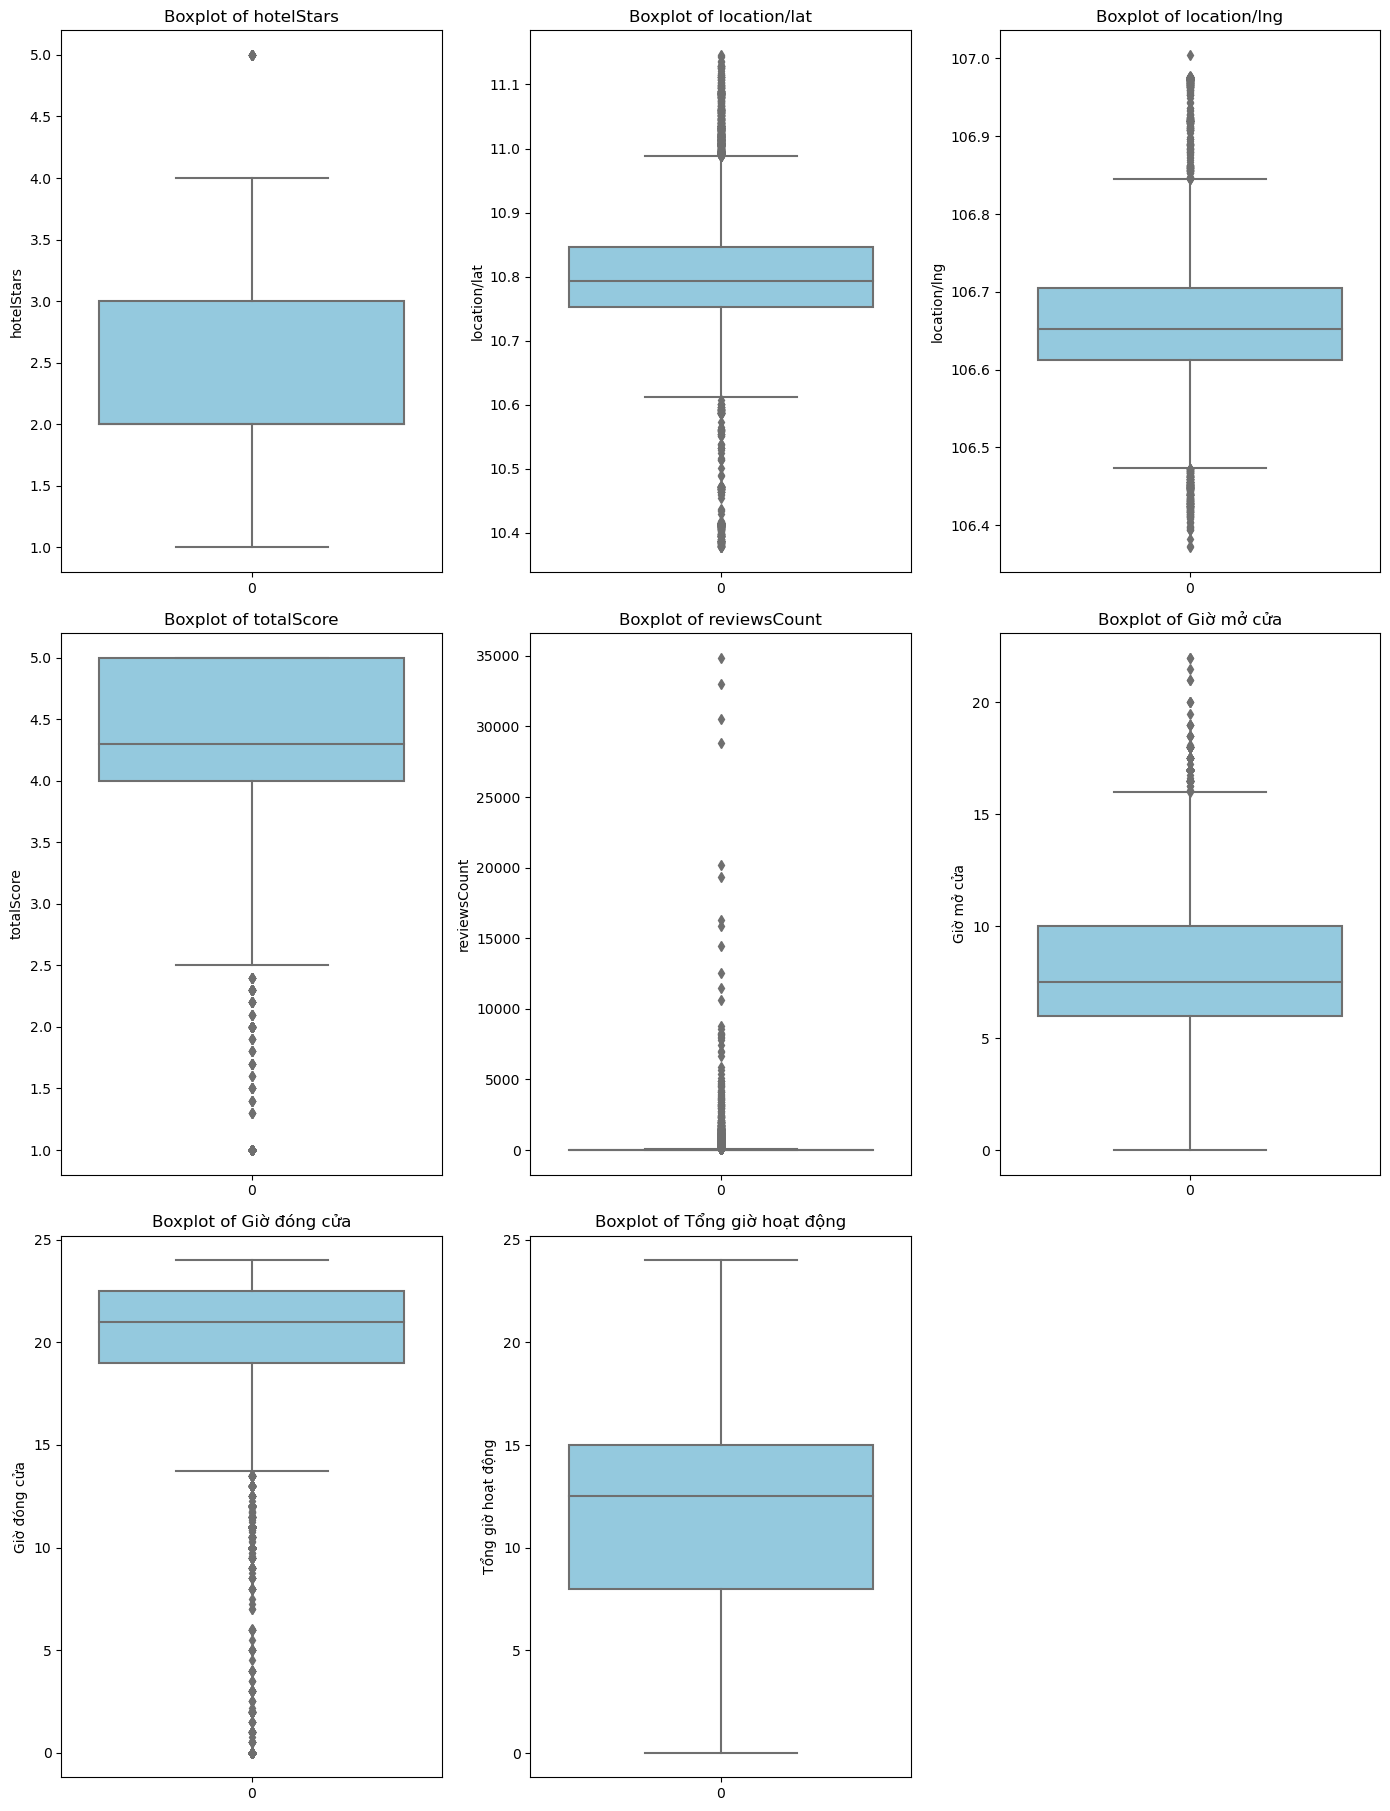

In [7]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns

num_plots = len(numeric_columns)
num_cols = 3
num_rows = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows*6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df[column], orient='v', color='skyblue', ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(f'Boxplot of {column}')
    axes[i // num_cols, i % num_cols].set_ylabel(column)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

**b) Phân tích cho các cột categorical:**

Đếm số lượng giá trị unique: Đếm số lượng giá trị duy nhất trong mỗi cột categorical.

In [9]:
categorical_counts = df.select_dtypes(include=['object']).nunique()
print(categorical_counts)

address         16236
categoryName      195
state              24
title           16411
Loại hình           3
dtype: int64


In danh sách các giá trị unique: In ra danh sách các giá trị duy nhất trong mỗi cột categorical.

In [10]:
cat_columns = df.select_dtypes(include=['object']).columns

cat_col_info_df = pd.DataFrame(columns=cat_columns)

for column in cat_columns:
    frequencies = collections.Counter(df[column].to_list())
    cat_col_info_df[column] = list([len(frequencies.keys()), frequencies])

cat_col_info_df.index = ['num_diff_vals', 'distribution']

cat_col_info_df

,address,categoryName,state,title,Loại hình
num_diff_vals,16236,195,24,16412,3
distribution,"{'2 Đ. Phù Đổng Thiên Vương, Phường 11, Quận 5...","{'Nhà hàng bánh kếp': 7, 'Khách sạn': 4239, 'N...","{'Quận 5': 240, 'Quận 8': 592, 'Quận 11': 319,...","{'Chú bánh hẹ Chợ Xã Tây': 1, 'Khách Sạn Như P...","{'Nhà hàng/ địa điểm ăn uống': 11188, 'Khách s..."


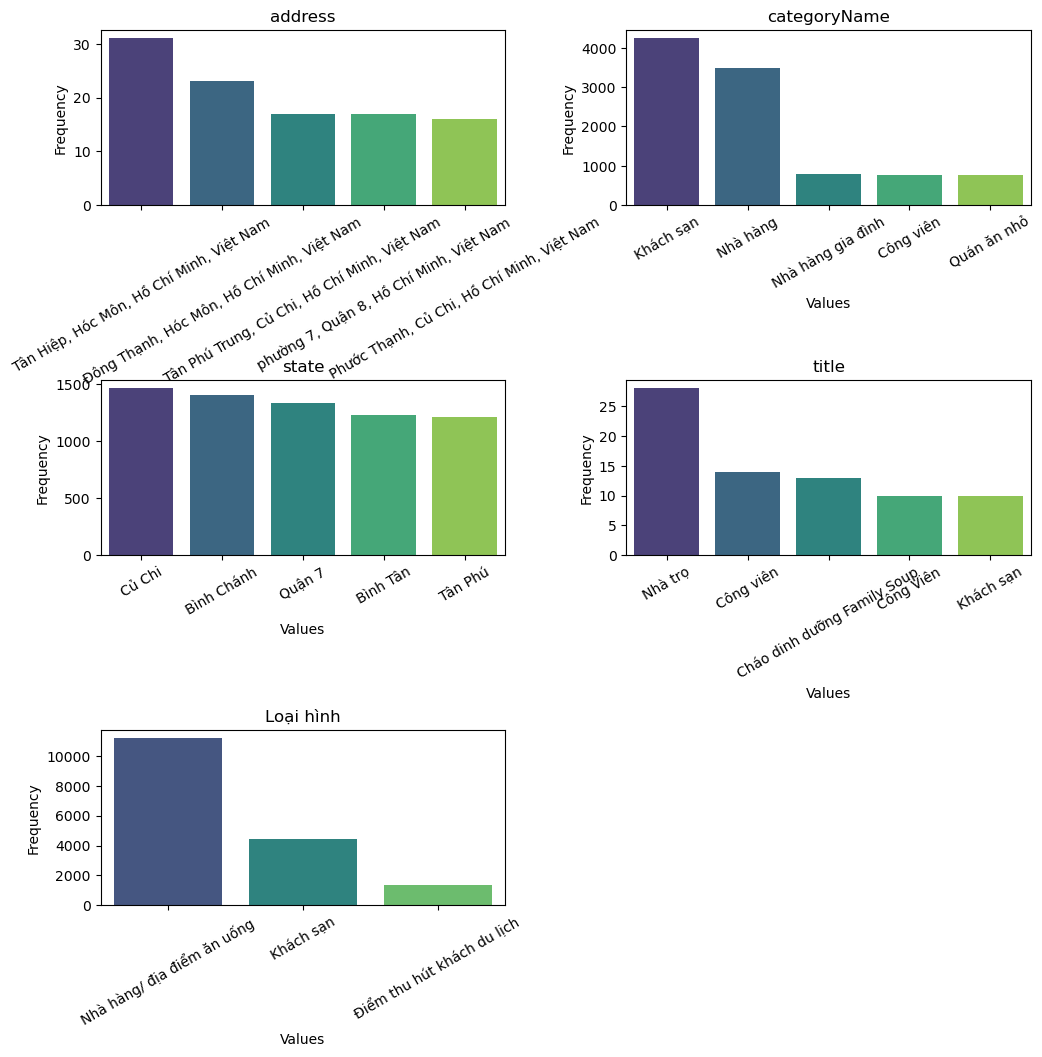

In [14]:
column_name = ['address','categoryName','state','title','Loại hình']
top_values = []
for col in column_name:
    distribution = cat_col_info_df[col]['distribution']
    top_values.append(dict(sorted(distribution.items(), key=lambda item: item[1], reverse=True)[:5]))

plt.figure(figsize=(12, 25))

for i, col in enumerate(column_name):
    plt.subplot(6, 2, i+1)
    values = list(top_values[i].keys())
    counts = list(top_values[i].values())
    sns.barplot(x=values, y=counts, palette="viridis")
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
#
plt.subplots_adjust(hspace=1.0, wspace=0.3)  
plt.show()